In [1]:
from process_helper import *
import numpy as np

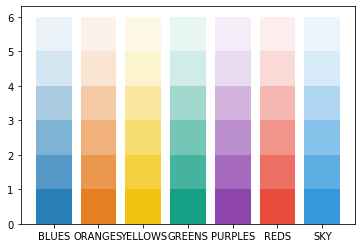

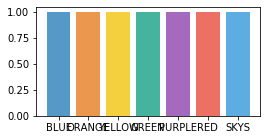

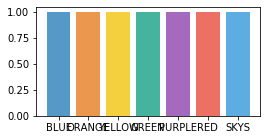

<Figure size 288x144 with 0 Axes>

In [2]:
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(4)
_, line_colors = select_color_idx(4)

In [3]:
plt.rcParams.update({'font.size': 15})
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

In [4]:
datadir = "../output/"

## Experiment 1: limit = 16k

In [5]:
exp = "exp_mix_ro_10g_fanout250_analysis"

In [6]:
data = [json.loads(line) for line in open(datadir + exp + ".txt")]
df = pd.DataFrame().from_records(data)

In [7]:
df.columns

Index(['abort_cnt_', 'accesses_', 'avg_commit_queue_sz_',
       'avg_log_flush_interval_ (us)', 'avg_log_group_sz_',
       'avg_log_latency_ (us)', 'avg_per_worker_runtime_sec',
       'avg_sum_commit_latency (us)', 'avg_sum_log_flush_latency (us)',
       'bufferd_idx_pgs_', 'cc_time_ms', 'commit_cnt_',
       'commit_latency_perc0_us', 'commit_latency_perc50_us',
       'commit_latency_perc99_us', 'commit_queue_sz_', 'g_buf_entry_sz',
       'g_buf_type', 'g_check_loaded', 'g_commit_group_sz', 'g_commit_pool_sz',
       'g_commit_queue_limit', 'g_cpu_freq', 'g_early_lock_release',
       'g_enable_group_commit', 'g_enable_logging',
       'g_enable_phantom_protection', 'g_force_write', 'g_idx_btree_fanout',
       'g_idx_btree_split_ratio', 'g_index_type', 'g_load_range',
       'g_load_to_remote_only', 'g_log_freq_us', 'g_node_id',
       'g_num_restore_thds', 'g_num_worker_threads', 'g_pagebuf_num_slots',
       'g_partition_sz', 'g_remote_req_retries', 'g_restore_from_remote',
 

In [9]:
# create pivot table
df0 = apply_mask(df, [
    ["g_buf_type", ["eq", "OBJBUF"]],
    ["g_enable_phantom_protection", ["eq", "True"]],
])
pivot0 = df0.groupby([
    "g_total_buf_sz",
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "remote_rds_", "commit_cnt_", "remote_rd_time_ms"
    ].max()
pivot0

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),num_flushes_,remote_rds_,commit_cnt_,remote_rd_time_ms
g_total_buf_sz,,,,,,,,,,,,
3000000000,527.248,0,0.841175,495066,12.2633,10709.0,3156.89,11603.8,5172,488,63400,2371.66
6000000000,1202.320,0,0.924312,536552,32.0650,12802.3,1894.54,13307.7,4509,597,144503,2993.62
9000000000,3316.710,0,0.974992,486524,463.4050,69513.9,2186.96,69837.0,861,524,398408,3052.77
15000000000,3721.830,0,1.000000,0,834.2080,117443.0,2260.39,117965.0,545,0,451394,0.00


In [10]:
# create pivot table
df2 = apply_mask(df, [
    ["g_buf_type", ["eq", "PGBUF"]],
    ["g_enable_phantom_protection", ["eq", "True"]],
])
pivot2 = df2.groupby([
    "g_total_buf_sz",
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "g_buf_type", "remote_rds_", "commit_cnt_", "remote_rd_time_ms",
    "idx_misses_", "idx_accesses_"
    ].max()
pivot2

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),num_flushes_,g_buf_type,remote_rds_,commit_cnt_,remote_rd_time_ms,idx_misses_,idx_accesses_
g_total_buf_sz,,,,,,,,,,,,,,,
3000000000,608.867,0,0.955782,177573,14.2645,11355.0,5585.80,11387.8,5270,PGBUF,177573,75152,970346.0000,4226,329827
6000000000,1021.730,0,0.973200,181400,27.9027,13185.5,3964.31,13211.6,4542,PGBUF,181400,126711,986247.0000,5558,555940
9000000000,1598.810,0,0.984630,164647,56.0212,16656.2,2898.12,16726.4,3588,PGBUF,164647,200926,950908.0000,7831,881315
15000000000,3727.820,0,1.000000,2,845.4360,116949.0,2219.20,117225.0,542,PGBUF,2,447295,12.6363,2,1962155


In [11]:
# create pivot table
df3 = apply_mask(df, [
    ["g_buf_type", ["eq", "NOBUF"]],
])
pivot3 = df3.groupby([
    "g_total_buf_sz", 
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", "commit_cnt_",
    "num_flushes_", "g_buf_type", "remote_rds_", "remote_rd_time_ms"
    ].max()
pivot3

,throughput_txn_per_sec,abort_cnt_,hit_rate_,misses_,avg_log_group_sz_,avg_sum_log_flush_latency (us),avg_log_latency_ (us),avg_log_flush_interval_ (us),commit_cnt_,num_flushes_,g_buf_type,remote_rds_,remote_rd_time_ms
g_total_buf_sz,,,,,,,,,,,,,
3000000000,87.1127,0,0.0,626727,1.61702,8098.61,11592.6,9270.72,10465,6473,NOBUF,541,2238.16


[0.3, 0.6, 0.9, 1.3]


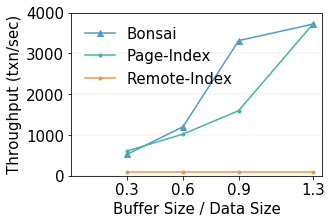

In [13]:
workload_ratio = [round(sz / 10240000000.0 * 10) / 10.0 for sz in pivot0.index]
workload_ratio[-1] = 1.3
print(workload_ratio)
fig, ax = plt.subplots(1, 1)
ax.plot(workload_ratio, 
        pivot0["throughput_txn_per_sec"],
        color=line_colors["BLUE"],
        marker="^", label="Bonsai")
ax.plot(workload_ratio, 
        pivot2["throughput_txn_per_sec"],
        color=line_colors["GREEN"],
        marker=".", label="Page-Index")
ax.plot(workload_ratio, 
        [pivot3["throughput_txn_per_sec"].values] * pivot0.shape[0],
        color=line_colors["ORANGE"],
        marker=".", label="Remote-Index")
# ax.set_title(plot_names[i])
plt.legend(frameon=False)
ax.set_ylim(0, 4000)
ax.set_xlim(xmin=0)
ax.set_xticks(workload_ratio)
ax.set_xlabel("Buffer Size / Data Size")
ax.set_ylabel("Throughput (txn/sec)")
fig.set_size_inches(4.5, 3)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
path = "/Users/scarlet/Desktop/Bonsai/figures/"
fig.savefig(path + "mix_ro_10g_fanout250_limit16k.pdf", bbox_inches="tight") 